# Exploratory Data Analysis Process

## Reading the data and seting imports


In [9]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt 

In [73]:
# Reading the data

with open ('../data\mini_gm_public_v0.1.p', 'rb') as f:
    data = pickle.load(f)

print('Type of the data:',type(data),'\n') 
print('Data:', data)

Type of the data: <class 'dict'> 

Data: {'300000082': {'595': {'3543': array([-3.71801294e-02,  1.74148595e+00,  1.20610332e+00, -4.51453179e-01,
       -7.36372828e-01,  1.70539236e+00,  7.38040149e-01,  1.02747023e+00,
        6.91435516e-01, -5.05316198e-01, -3.29076856e-01,  6.26897097e-01,
        1.24551857e+00,  1.17993450e+00, -4.68668282e-01, -5.55515885e-01,
        1.38824713e+00,  2.59063840e-01,  1.03511488e+00, -6.97107494e-01,
       -7.86004663e-02,  1.87426817e+00, -2.71923512e-01,  1.13101208e+00,
       -1.58922470e+00,  3.27991724e+00, -2.46273756e+00, -6.33640587e-01,
        1.05565846e+00,  1.53836107e+00, -2.72698849e-01, -1.12991619e+00,
       -2.18286490e+00,  1.28575361e+00, -3.09046119e-01, -1.52148962e+00,
       -1.68231571e+00,  2.51645446e-01, -6.01363719e-01, -2.81734324e+00,
       -1.84438765e+00,  1.09136963e+00, -2.92983323e-01, -2.79257089e-01,
       -1.22333348e+00, -1.83978617e+00, -7.21484661e-01,  1.60358667e-01,
       -1.06005037e+00,  1.9

In [7]:
# Checking the type of the data 
print(type(data)) 

<class 'dict'>


In [40]:
# Flattening the data

# Iterate over the dictionary
rows = []
for syndrome_id, subjects in data.items():
    for subject_id, images in subjects.items():
        for image_id, embedding in images.items():
            rows.append([str(syndrome_id), str(subject_id), str(image_id)] + list(embedding))

column_names = ["syndrome_id", "subject_id", "image_id"] + [f"dim_{i}" for i in range(len(rows[0]) - 3)]
df = pd.DataFrame(rows, columns=column_names)

df.head(4)

syndrome_id subject_id image_id     dim_0     dim_1     dim_2     dim_3  \
0   300000082        595     3543 -0.037180  1.741486  1.206103 -0.451453   
1   300000082       2638     1633  2.424995  0.179920  2.950325  0.379930   
2   300000082     734490   742992 -1.789331 -0.216211  0.434315 -0.552323   
3   300000082       2770     1812 -1.143693 -0.714621  0.319488  0.455682   

      dim_4     dim_5     dim_6  ...   dim_310   dim_311   dim_312   dim_313  \
0 -0.736373  1.705392  0.738040  ...  1.783927  1.587222 -1.522482 -3.935935   
1 -0.158152 -0.238334 -0.436916  ... -0.665296  0.367323 -2.437823 -2.704050   
2 -1.065345  1.817165  0.006342  ...  0.439080  0.861753 -0.544255 -0.486401   
3  1.571120 -0.837411  0.726402  ... -0.414648 -0.121709 -1.838737 -0.405826   

    dim_314   dim_315   dim_316   dim_317   dim_318   dim_319  
0  0.007990  0.668852  1.129786  0.097900 -0.768619  0.271600  
1  1.696490 -0.471431  2.529153  1.107004 -3.214602 -1.450313  
2 -2.228478  0.964719 -0.297413 -0.623660 -0.208614  0.236617  
3  0.190536  0.651180  0.539327 -0.103917 -3.094141  0.867695  

[4 rows x 323 columns]

## Data anlaysis

In [41]:
# Checking the len

len(df)

1116

In [21]:
# Generating summary numerical columns 
df.describe()

dim_0        dim_1        dim_2        dim_3        dim_4  \
count  1116.000000  1116.000000  1116.000000  1116.000000  1116.000000   
mean      0.188237    -0.194125     0.289478     0.189808     0.111680   
std       1.214633     1.139059     1.104451     1.143740     1.125660   
min      -3.394715    -3.868969    -3.462332    -4.630266    -3.850852   
25%      -0.677759    -0.965658    -0.524360    -0.529604    -0.587708   
50%       0.171310    -0.181424     0.223773     0.181827     0.074132   
75%       0.997797     0.531328     1.049916     0.946147     0.843491   
max       4.361497     4.208456     3.845125     4.958758     4.271598   

             dim_5        dim_6        dim_7        dim_8        dim_9  ...  \
count  1116.000000  1116.000000  1116.000000  1116.000000  1116.000000  ...   
mean      0.172219    -0.083572    -0.047385    -0.516364     0.117798  ...   
std       1.136079     1.096714     1.267452     1.226792     1.196874  ...   
min      -4.167489    -4.237203    -4.418729    -4.886925    -3.353356  ...   
25%      -0.587537    -0.798839    -0.922694    -1.397137    -0.759928  ...   
50%       0.155792    -0.088845    -0.067401    -0.467888     0.147395  ...   
75%       0.924198     0.662768     0.831271     0.275540     0.929895  ...   
max       3.580018     3.720086     3.337309     3.841391     3.799084  ...   

           dim_310      dim_311      dim_312      dim_313      dim_314  \
count  1116.000000  1116.000000  1116.000000  1116.000000  1116.000000   
mean      0.149016    -0.175285    -0.363253    -0.440297     0.440265   
std       1.095465     1.138694     1.247261     1.225546     1.180652   
min      -3.385549    -3.812167    -4.580696    -4.710657    -2.956204   
25%      -0.552941    -0.930189    -1.200357    -1.218143    -0.398629   
50%       0.207169    -0.142210    -0.321168    -0.431931     0.438102   
75%       0.856770     0.575967     0.485152     0.347771     1.264026   
max       3.893097     4.231478     3.527310     4.163231     4.478567   

           dim_315      dim_316      dim_317      dim_318      dim_319  
count  1116.000000  1116.000000  1116.000000  1116.000000  1116.000000  
mean      0.558534     0.247313    -0.005239    -0.812096    -0.310028  
std       1.112430     1.168045     0.990698     1.286715     1.099278  
min      -2.771579    -3.054781    -3.288884    -4.659004    -4.474509  
25%      -0.182921    -0.560715    -0.666347    -1.677250    -1.044254  
50%       0.538514     0.273934     0.041906    -0.826081    -0.293969  
75%       1.227969     1.055726     0.679501    -0.034336     0.456748  
max       4.978546     4.969191     2.797920     3.320703     3.122568  

[8 rows x 320 columns]

In [36]:
# Checking null values 
df.isnull().sum()[df.isnull().sum() > 0]


Series([], dtype: int64)

In [29]:
# Counting the number of unique values 
category_counts = df.nunique()
print(category_counts)

syndrome_id      10
subject_id      941
image_id       1116
dim_0          1116
dim_1          1116
               ... 
dim_315        1116
dim_316        1116
dim_317        1116
dim_318        1116
dim_319        1116
Length: 323, dtype: int64


## Data Distribution

In [31]:
# Exploring the distribution of data to identify patterns or inconsistencies.
columns_to_analyze = [col for col in ['syndrome_id', 'subject_id']]
for col in columns_to_analyze:
    print(f"Feature: {col}")
    print(df[col].value_counts())
    print("\n")

Feature: syndrome_id
syndrome_id
300000034    210
300000080    198
100192430    136
300000007    115
300000082     98
100610443     89
300000018     74
100180860     67
100610883     65
700018215     64
Name: count, dtype: int64


Feature: subject_id
subject_id
8980      11
8974      10
8977      10
8982       9
8976       8
          ..
8861       1
8830       1
8767       1
8848       1
739895     1
Name: count, Length: 941, dtype: int64




### Syndrome


In [53]:
# Number of unique syndromes
num_syndromes = df['syndrome_id'].nunique()

# Number of unique images per syndromes
images_per_syndrome = df['syndrome_id'].value_counts()

print(f"Number of syndromes: {num_syndromes}")
print(f"Images per syndrome: \n{images_per_syndrome}")


Number of syndromes: 10
Images per syndrome: 
syndrome_id
300000034    210
300000080    198
100192430    136
300000007    115
300000082     98
100610443     89
300000018     74
100180860     67
100610883     65
700018215     64
Name: count, dtype: int64


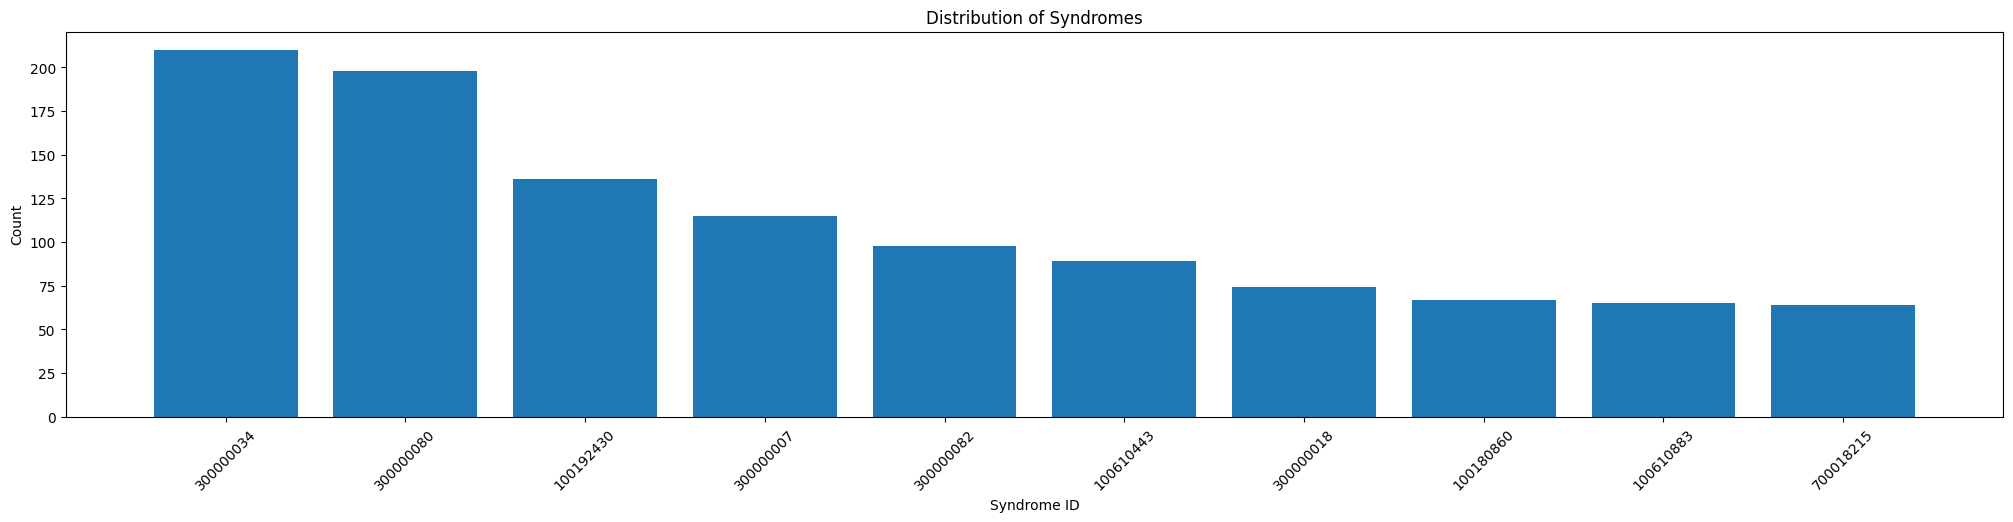

In [48]:
counts = df['syndrome_id'].value_counts()

# Vizualize the number of unique images per syndromes
plt.figure(figsize=(25, 5))  
plt.bar(counts.index, counts.values)  
plt.xticks(rotation=45)  
plt.title('Distribution of Syndromes')  
plt.xlabel('Syndrome ID')  
plt.ylabel('Count')  
plt.show()  

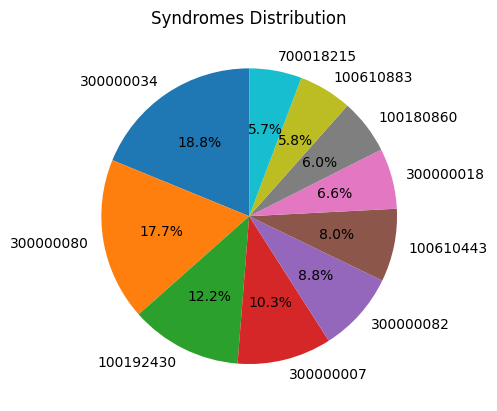

In [ ]:
# Vizualize the distribution of unique images per syndromes
counts = df['syndrome_id'].value_counts()

plt.pie(counts.values, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title('Syndromes Distribution')
plt.show()


### Subject

In [61]:
# Number of unique subjects
num_subject = df['subject_id'].nunique()

# Bumber os images per subjects
images_per_subject = df['subject_id'].value_counts()

print(f"Number of syndromes: {num_subject}")
print(f"Images per syndrome: \n{images_per_subject}")

Number of syndromes: 941
Images per syndrome: 
subject_id
8980      11
8974      10
8977      10
8982       9
8976       8
          ..
8861       1
8830       1
8767       1
8848       1
739895     1
Name: count, Length: 941, dtype: int64


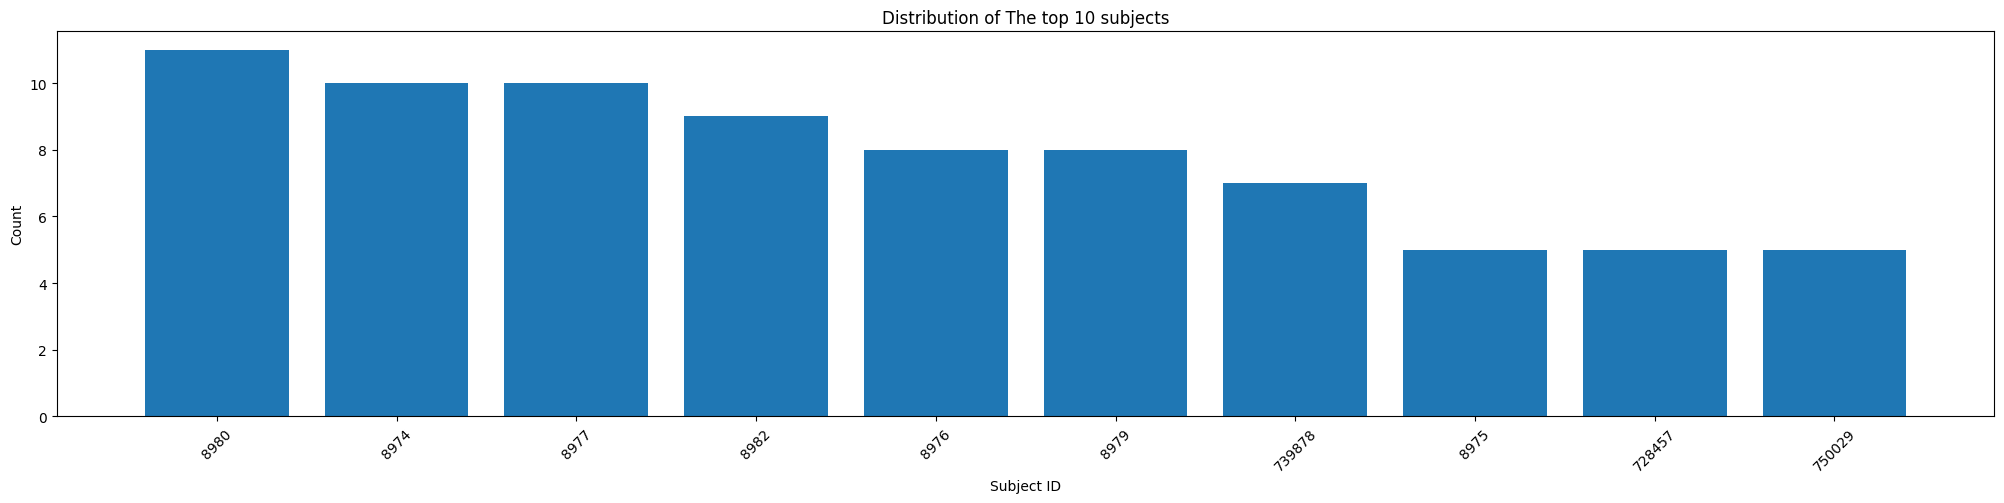

In [76]:
top_subjects = df['subject_id'].value_counts().head(10)

# Visualize the distributions of the top 10 subjects
plt.figure(figsize=(25, 5))  
plt.bar(top_subjects.index, top_subjects.values)  
plt.xticks(rotation=45)  
plt.title('Distribution of The top 10 subjects')  
plt.xlabel('Subject ID')  
plt.ylabel('Count')  
plt.show()  